# Homework 1 (80 points)

In this homework, you will first implement both insertion sort and merge sort and study their runtime behavior experimentally. 
Then, you will solve a classic algorithmic problem, tagged as medium difficulty on leetcode.

The objectives for this homework are:

* Understand that runtime is a function of input size
* Understand that runtime is not just a function if input size
* Understand the concept of best and worst case input
* Understand that the runtime can be roughly described as a polynomial and that it reflects the number of nested loops
* Understand how to experimentally study and compare algorithms
* Understand that different algorithms solving the same problem can have widely different runtime
* Understand that sorting is one of the most powerful algorithm design tool
* Practice your programming skills!
* Solve a non-trivial and popular algorithmic problem

We will use the array from the standard library. The only function you will need is 'array.array' which creates an array. For example, 'array.array('i',[1,2,3])' returns an array of integers created from the list [1,2,3]. These arrays are typed (that's what the 'i' is for) and can allow you to write faster, tighter code.

In [38]:
import array

To do our experimental work, you will measure the runtime of functions using the 'time.time' function. This function takes no arguments and returns the time in seconds that have passed since January 1, 1970, 00:00:00 (UTC).

In [39]:
import time

To create our experiments, you will use the 'random.randint' function. A call to 'random.randint(a,b)' returns a random integer between a and b, inclusive.

In [40]:
import random

The matplotlib.pyplot is a very popular library to make plots. The key function is 'plt.plot' which takes at least the x coordinates and y coordinates of the data you want to plot. To make your plot look nice, you should also consider using functions such as 'plt.legend', 'plt.xlabel', 'plt.ylabel', 'plt.title', and give your plots a color and a label. 

In [41]:
import matplotlib.pyplot as plt

## Part 1 (20 points)

We will start our journey as an experimental computer scientist by implement insertion sort and comparing its runtime behavior on different kind of inputs.

**Problem 1 (5 points): implement insertion sort, as presented in class. Note that your function need not return anything, the array will be modified in place. Do not implement the algorithm resursively.**

In [42]:
def insertionSort(arr):
    assert(isinstance(arr,array.array))
    
    for i in range(1, len(arr)): 
        key = arr[i] 
        j = i-1
        while (j >= 0 and key < arr[j]): 
                arr[j + 1] = arr[j] 
                j -= 1
        arr[j + 1] = key   
        
    return arr

**Problem 2 (5 points): implement a timer. The timer takes two arguments: a function 'f' to be timed, and an array 'arr'. The timer should execute 'f(arr)' and measure how long it runs, in seconds. The timer should return this timing.** 

In [43]:
def timer(f, arr):
    assert(callable(f))
    assert(isinstance(arr, array.array))
    
    start = time.time()
    f(arr)
    end = time.time()
    
    return end - start

The following two functions will generate an array of size n where the values are, respectively, in increasing and decreasing order.

In [44]:
def gen_increasing(n):
    return array.array('i',range(1,n))

In [45]:
def gen_decreasing(n):
    return array.array('i',range(n,1,-1))

**Problem 3  (5 points): implement a random generator of arrays of integers. The generator takes one argument: an integer 'n' for the size of the array. Every call to the generator should return a different, randomly generated, array of integers.**

In [46]:
def gen_random(n):
    assert(isinstance(n, int))
    assert(n >= 0)
    
    arr = array.array('i', [random.randint(1, 100) for _ in range(n)])
    
    return arr

**Problem 4  (5 points): implement a function that runs a sequence of experiments and plot the result of these experiments. It takes two arguments: 'f' is the function to be experimented with, and 'n' is an integer representing the largest array size to experiment on. For all array sizes from 0 to n, you should generate three arrays: increasing, decreasing, and a random one. You should  time the application of f to these three arrays. Finally, you should plot the results of this experiment.**

In [47]:
def compareInputs(f, n):
    assert(callable(f))
    assert(isinstance(n, int))
    assert(n >= 0)
    
    inc_timing = array.array('f', n * [0])
    dec_timing = array.array('f', n * [0])
    ran_timing = array.array('f', n * [0])
    
    for i in range(n):
        expIn = gen_increasing(i)
        expDe = gen_decreasing(i)
        expRa = gen_random(i)
        
        inc_timing[i] = timer(f, expIn)
        dec_timing[i] = timer(f, expDe)
        ran_timing[i] = timer(f, expRa)
        
    x = list(range(n))
    
    plt.title("Comparison of Insertion Sort On Different Inputs")
    plt.xlabel("Problem Size")
    plt.ylabel("Time(s)")
    
    plt.plot(x, inc_timing, "-b", label='increasing')
    plt.plot(x, dec_timing, "-r", label='decreasing')
    plt.plot(x, ran_timing, "-g", label='random')
    plt.legend(loc="upper left")

We're now ready to run our first experiments and study how different inputs affect the runtime. Executing the following cell should produce a plot with 3 curves. 

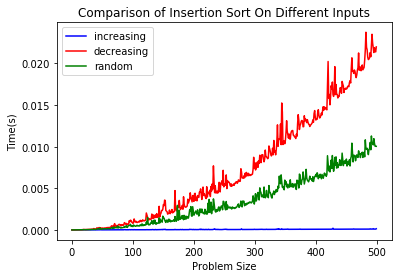

In [48]:
compareInputs(insertionSort,500)

This is an important lesson. For a give input size n, the runtime can depend on the 'shape' if the input. For insertion sort in particular, it seems like the algorithm is super fast in some cases, while it is very slow on others. That raises a question: when we want to compare algorithms, should we compare them based on how good they can be on some inputs, or on how bad things can get? In general, it is more useful to understand the runtime behavior for the worst possible case. It's not always perfect, but it is often the simplest and most effective way to analyze an algorithm. This is what is called worst-case analysis. Note that it's not always trivial to understand what the worst case is.

## Part 2 (20 points)

We're now ready to implement the famous mergesort algorithm. We will then run some experiments to compare our two sorting algorithms, insertion sort and merge sort.

**Problem 5  (5 points): implement the merge algorithm, as described in class. merge takes 4 arguments: an array of integers 'arr', and integers 'l', 'm', 'r' representing respectively a left, middle, and right index. merge sorts the array in place and does not return anything.**   

In [49]:
def merge(arr, l, m, r): 
    assert(isinstance(arr,array.array))
    assert(isinstance(l,int))
    assert(isinstance(m,int))
    assert(isinstance(r,int))
    assert(l >= 0)
    assert(m >= l)
    assert(r >= m)
    
    if(arr[m] > arr[m+1]):
        left = arr[l:m+1]
        right = arr[m+1:r+1]
        
        i = j = 0 
        k = l
        
        lenL  = m + 1 - l
        lenR = r - m

        while i < lenL and j < lenR:
            if left[i] <= right[j]:
                arr[k] = left[i]
                i = i + 1
            else:
                arr[k] = right[j]
                j = j + 1
            k = k + 1

        while(i < lenL):
            arr[k] = left[i]
            i = i + 1
            k = k + 1

**Problem 6  (5 points): implement the mergesort algorithm with extra parameters for indices into the array. mergesort takes 3 arguments: an array of integers 'arr', and integers 'l', 'r' representing respectively a left, middle, and right index. merge sorts the array in place and does not return anything.**

In [50]:
def mergeSortAux(arr,l,r):
    assert(isinstance(arr,array.array))
    assert(isinstance(l,int))
    assert(isinstance(r,int))
    assert(l >= 0)
    assert(r >= l)
    assert(len(arr) >= 2)
    
    if (l < r):

        m = (l+r)//2
        
        mergeSortAux(arr, l, m)
        mergeSortAux(arr, m+1, r)
        
        merge(arr, l, m, r)

**Problem 7 (5 points): implement the mergesort algorithm. It takes an array 'arr', sorts in place and doesn't return anything.**

In [51]:
def mergeSort(arr):
    assert(isinstance(arr,array.array))
    if len(arr) > 1:
        mergeSortAux(arr, 0, len(arr) - 1)
    else:
        return arr
    
    return arr

**Problem 8  (5 points): implement a function that runs a sequence of experiments and plot the result of these experiments. It takes three arguments: 'f1' and 'f2' are the functions to be compared, and 'n' is an integer representing the largest array size to experiment on. Since we have established that it is the worst case, for all array sizes from 0 to n, you should generate one arrays: decreasing. You should  time the application of f to these three arrays. Finally, you should plot the results of this experiment.** 

In [52]:
def compareTwoFunctions(f1,f2,n):
    assert(callable(f1))
    assert(callable(f2))
    assert(isinstance(n, int))
    assert(n >= 0)

    f1_timing = array.array('f', n * [0])
    f2_timing = array.array('f', n * [0])
        
    for i in range(n):
        decreasing1 = gen_decreasing(i)
        decreasing2 = gen_decreasing(i)

        f1_timing[i] = timer(f1, decreasing1)
        f2_timing[i] = timer(f2, decreasing2)
    
    x = list(range(n))
    
    plt.title('Comparison of Different Functions')
    plt.xlabel('Problem Size')
    plt.ylabel('Time(s)')
    
    plt.plot(x, f1_timing, "-b", label='insertionSort')
    plt.plot(x, f2_timing, "-r", label='mergeSort')
    plt.legend(loc='upper left')

We're now ready to run our second experiments and compare our two sorting algorithms. Executing the following cell should produce a plot with 2 curves.

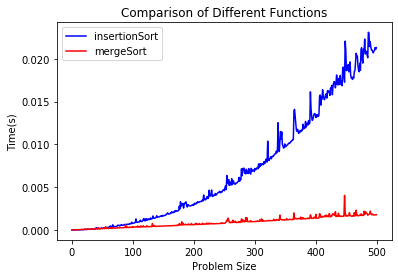

In [53]:
compareTwoFunctions(insertionSort,mergeSort,500)

This should just confirm what you have now know for years: different algorithms have very different runtime behaviors. The purpose of analysis of algorithms is to predict what these runtime curve are by analysing the code. It is in this sense that analysis of algorithms is 'theoretical': we try to analyze the behavior of an algorithm from first-principles, without running it. Perhaps surprisingly, until the sixties, computer scientists did not believe that it was possible to analyze the runtime of an algorithm in theory. You probably associate the word 'theory' with abstract non-sense, but in this case, it really just means using a little bit of math to learn something without running experiments. 

# Part 3 (40 points)

The following problem is a classic. In fact, I was given this problem a few years ago at an on-site interview for Facebook. The problem is defined as follows:

Input: array of integers
Output: count of how many triples sum to 0

It is usually a great idea to start simple and think about a naive solution to the problem. You should be able to do this by yourself, and you may want to take a few minutes to thing about it. However, I am providing you with an implementation of the naive solution. 

In [59]:
def count3(arr): 
    assert(isinstance(arr,array.array))
    n = len(arr)
    count = 0
    
    for i in range(0, n-2): 
        for j in range(i + 1, n-1):  
            for k in range(j + 1, n): 
                if arr[i] + arr[j] + arr[k] == 0: 
                    count +=1
      
    return count

**Problem 9 (40 points): design and implement an improved version of the naive algorithm. It is not good enough to tweak the code to make it run slitghtly faster. You need to use what you have learned so far about the design of algorithms to come up with an algorithm whose runtime will be a curve with a makedly different shape that the naive one.**

In [58]:
def count3Opt(arr):
    assert(isinstance(arr,array.array))
    n = len(arr)
    count = 0 
    
    for i in range(n-1):
        s = dict()
        
        for j in range(i + 1, n):
            x = -(arr[i] + arr[j])
            
            if x in s:
                count += s[x]
            
            s[arr[j]] = s.get(arr[j],0)+1
    

    return count

In [60]:
compareTwoFunctions(count3,count3Opt,200)

UnboundLocalError: local variable 's' referenced before assignment

The following cell will run some experiments to compare the algorithms.

In [57]:
compareTwoFunctions(count3,count3Opt,200)

UnboundLocalError: local variable 's' referenced before assignment

That's it, you're done with homework 1, congratulations. 